# Preparing Data

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2022):
    dfs.append(pd.read_csv(f"./data/csv/{i}_lake_data.csv"))

df = pd.concat(dfs)
df

,STN Code,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,8.4,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [2]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765.0,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
1089,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
1090,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
1091,2521.0,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [3]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.astype({"STN Code":int})
df

,STN Code,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
1089,2544,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
1090,2522,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
1091,2521,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [4]:
df.dtypes

STN Code                       int64
State Name                    object
Min Temperature              float64
Max Temperature              float64
Min Dissolved Oxygen         float64
Max Dissolved Oxygen         float64
Min pH                       float64
Max pH                       float64
Min Conductivity             float64
Max Conductivity             float64
Min BOD                      float64
Max BOD                      float64
Min Nitrate N + Nitrite N    float64
Max Nitrate N + Nitrite N    float64
Min Fecal Coliform           float64
Max Fecal Coliform           float64
Min Total Coliform           float64
Max Total Coliform           float64
dtype: object

# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$

$K$ is the constant of proportionality and is defined by 

$$ K = \frac{1}{\sum S_i} $$ <br />

| Parameter | Standard Value ($S_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 10 |
| pH | 8.5 |
| Conductivity (µS/cm) | 1000 |
| Biological Oxygen Demand (mg/L) | 5 |
| Nitrate (mg/L) | 45 |
| Fecal Coliform (per 100 mL) | 100 |
| Total Coliform (per 100 mL) | 1000 |


In [5]:
stv = np.array([10,8.5,1000,5,45,100,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.22130294 0.2603564  0.00221303 0.44260588 0.04917843 0.02213029
 0.00221303]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2213 |
| pH | 0.2603 |
| Conductivity (µS/cm) |  0.0022 |
| Biological Oxygen Demand (mg/L) | 0.4426 |
| Nitrate (mg/L) | 0.04917 |
| Fecal Coliform (per 100 mL) | 0.02213 |
| Total Coliform (per 100 mL) | 0.00221 |

Ideal Values in pure water are given by,

| Parameter | Ideal Value ($V_{ideal}$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 14.6 |
| pH | 7 |
| Conductivity (µS/cm) | 0 |
| Biological Oxygen Demand (mg/L) | 0 |
| Nitrate (mg/L) | 0 |
| Fecal Coliform (per 100 mL) | 0 |
| Total Coliform (per 100 mL) | 0 |

In [6]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

93.34277805867758

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
In order to calculate the WQI for a lake , we need to estimate the average value for each parameter from the min and max values.

Assuming that these features are roughly normally distributed, we can then say that the average(median) value for the parameter would be midway between the min and the max value. For example, when considering pH to be distributed normally over all the samples, we could say :

$$ pH_{average} \approx \frac{(pH_{min} + pH_{max})}{2} $$

For features like pH, Dissolved Oxygen, Conductivity and Nitrates, this approximation does give close results to the actual mean in other lakes where annual data has been recorded.

In [7]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a

,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
1088,7.45,7.85,539.0,2.95,1.100,560.0,1400.0
1089,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0
1090,7.60,7.25,21.0,1.05,0.300,90.0,160.0
1091,7.70,7.25,28.0,1.40,0.300,95.0,220.0


# Classification of water bodies

In [8]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a

,STN Code,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
1088,1765,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,88.207735
1089,2544,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,215.224834
1090,2522,7.60,7.25,21.0,1.05,0.300,90.0,160.0,49.375099
1091,2521,7.70,7.25,28.0,1.40,0.300,95.0,220.0,52.117725


In [9]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[31, 461, 248, 102, 248]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 31 |
| 50 - 100 | Good | 461 |
| 100 - 200 | Poor | 248 |
| 200 - 300 | Very Poor | 102 |
| > 300 | Unsuitable for Drinking | 248 |

# Boxplots

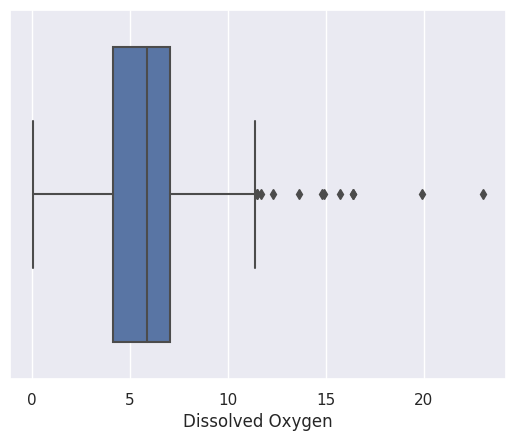

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("Dissolved Oxygen")

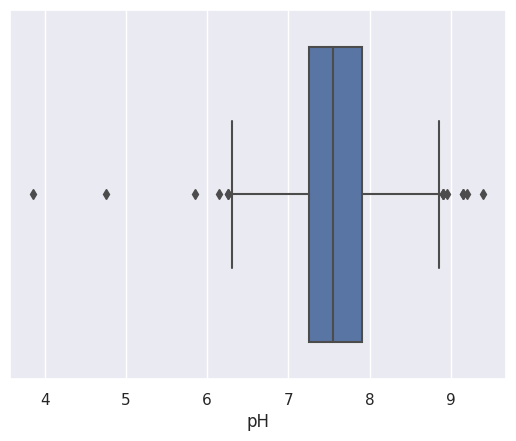

In [11]:
boxplot("pH")

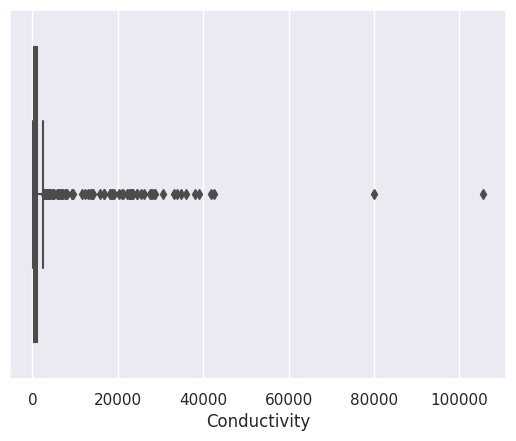

In [12]:
boxplot("Conductivity")

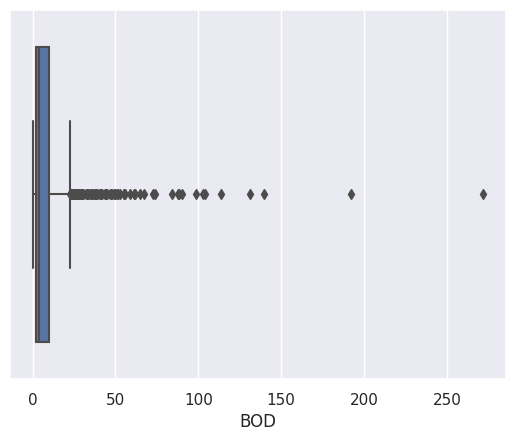

In [13]:
boxplot("BOD")

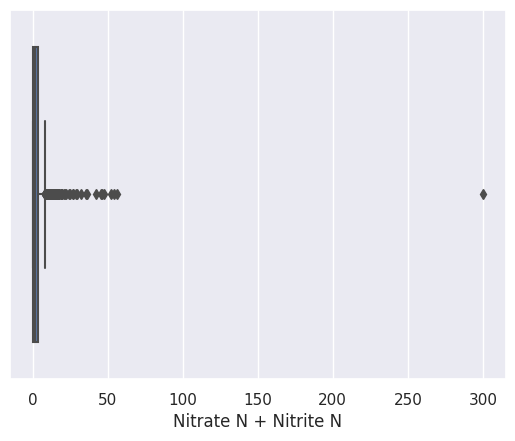

In [14]:
boxplot("Nitrate N + Nitrite N")

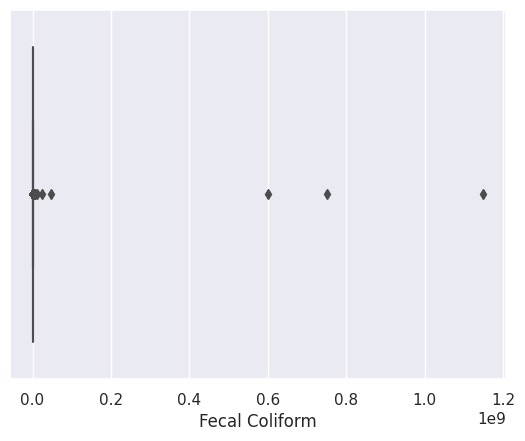

In [15]:
boxplot("Fecal Coliform")

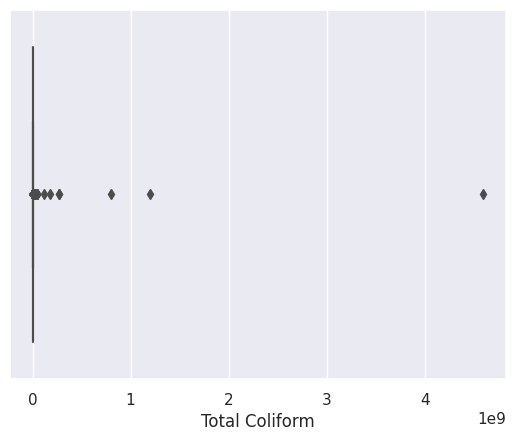

In [16]:
boxplot("Total Coliform")

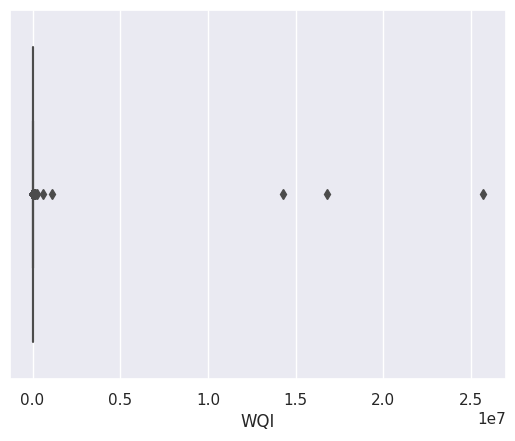

In [17]:
boxplot("WQI")

We can see that there is an extreme right skew to the data of almost all parameters, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers 

In [18]:
df_a = df_a[df_a["WQI"]<2000]
df_a

,STN Code,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
1088,1765,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,88.207735
1089,2544,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,215.224834
1090,2522,7.60,7.25,21.0,1.05,0.300,90.0,160.0,49.375099
1091,2521,7.70,7.25,28.0,1.40,0.300,95.0,220.0,52.117725


# Predicting WQI with lesser parameters

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ncols = ["Dissolved Oxygen","pH","Conductivity","BOD","Nitrate N + Nitrite N","Fecal Coliform","Total Coliform"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

s = MinMaxScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,0.358696,0.630631,0.001890,0.019886,0.000999,0.013178,2.779808e-04,76.071259
1,0.047826,0.684685,0.015698,0.101136,0.024136,0.000607,7.155942e-05,157.051491
2,0.304348,0.522523,0.000582,0.015909,0.001065,0.014528,2.779808e-04,70.985820
3,0.234783,0.729730,0.009817,0.051136,0.008989,0.017779,1.073391e-03,133.332833
4,0.250000,0.810811,0.003992,0.022727,0.004328,0.000184,1.926600e-05,84.067161
...,...,...,...,...,...,...,...,...
800,0.378261,0.657658,0.011594,0.002273,0.002147,0.000025,1.403665e-05,38.956425
801,0.247826,0.711712,0.020209,0.026705,0.001298,0.000012,9.174284e-07,77.714952
802,0.369565,0.792793,0.008065,0.066477,0.001781,0.234960,5.403653e-03,533.105647
803,0.047826,0.657658,0.014359,0.215909,0.007990,0.000773,7.715573e-05,243.606110


<AxesSubplot: >

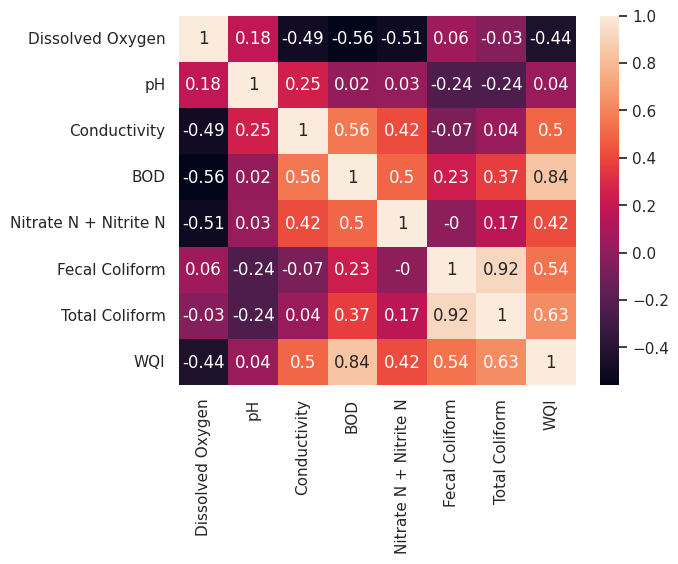

In [20]:
cmatrix = sdf.corr(method='spearman').round(2)
sns.heatmap(cmatrix,annot=True)

In order to reduce the number of features required for prediction, we can select the features with higher correlation to WQI and lesser inter correlation. Considering the top 4 highest correlations, we get BOD,Fecal Coliform,Total Coliform and Dissolved Oxygen. We see that Fecal Coliform and Total Coliform are highly correlated themselves and so it would be better to drop one of them. Thus, we can reduce the number of features required to 3.

In [21]:
selected_features = [0,3,5] # BOD,Fecal Coliform,Dissolved Oxygen
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(805, 3)


# Regression Model

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_squared_error

reg = LassoCV(cv=5,random_state=10).fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 12.0842758196653
R2 : 0.9980565618692444


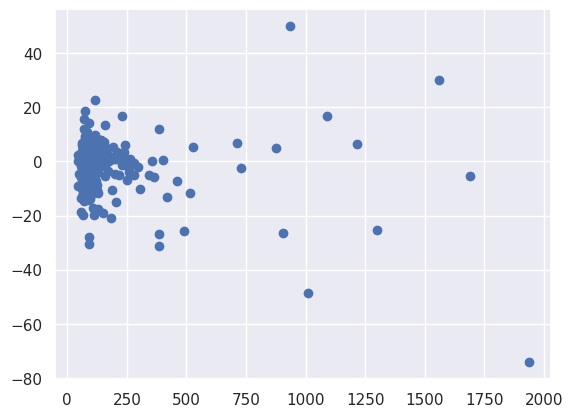

In [23]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

No bias in the residuals

Accuracy = 0.9405940594059405


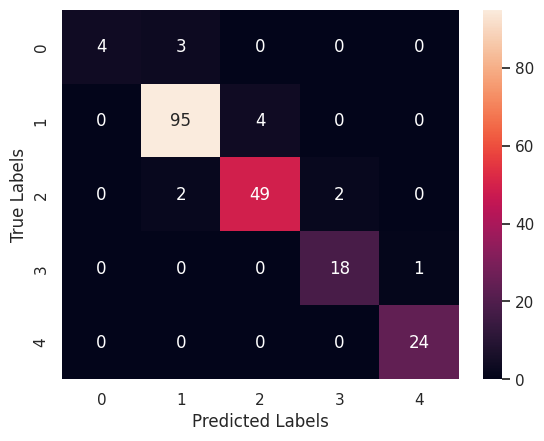

In [24]:
#testing classification accuracy
from sklearn.metrics import accuracy_score,confusion_matrix

def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)    
    
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()